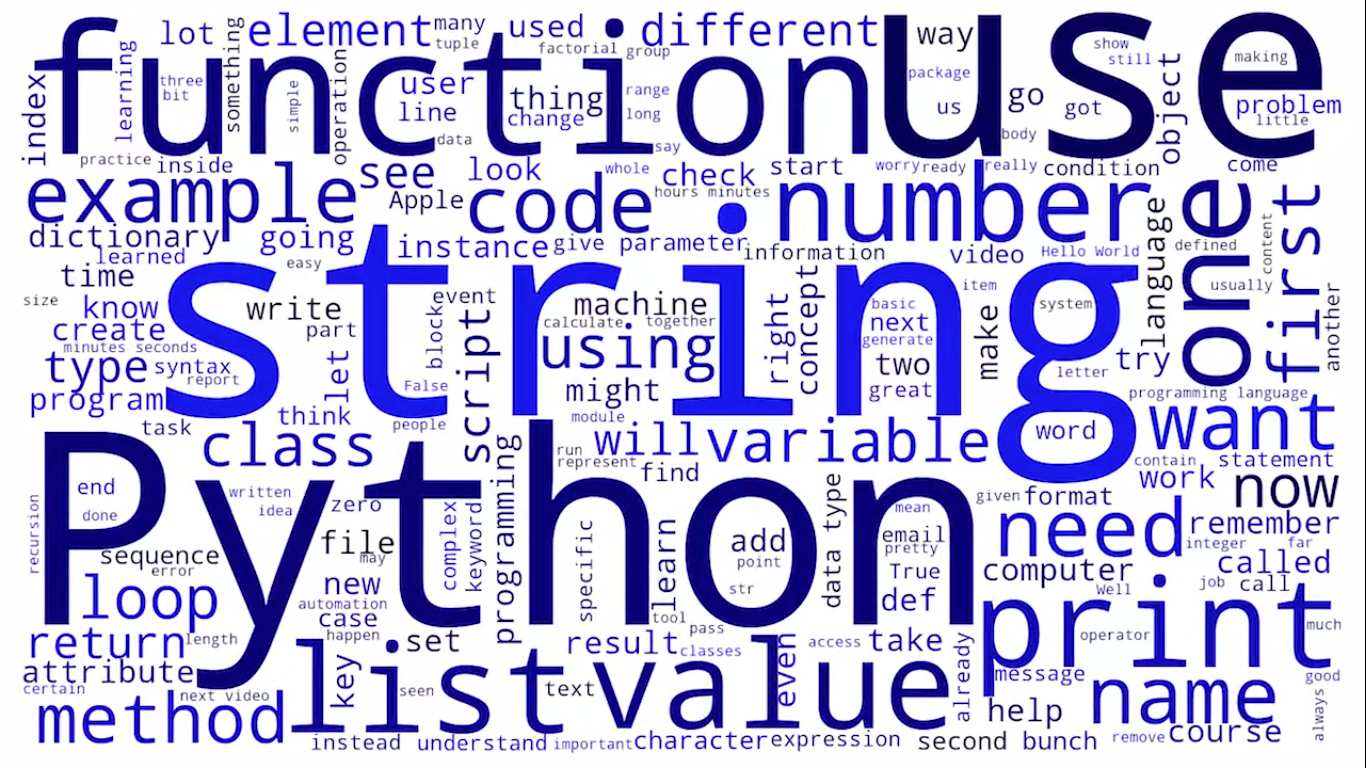
# Word Cloud
## Problem Statement:
A word cloud is an image that's made up of **different sized words**. Usually the **sizes of the words are determined by how many times each word appears in a specific text**. To create the image itself, we're going to use an **external Python module** called creatively Word cloud. Your job is to 
- **create a script that would go through the text and count how many times each word appears.**

## Work Plan:
- understand the **problem statement**
- **research** available options
- **plan** the perfect approach
- **write code/script**
- finally **execute**.

## Notes:
- use a **dictionary** to count how many times each word appears
- prepare the dictionary and use that as a **parameter for the word cloud module**.
- **two things** we have to watch out for -
    - One, **punctuation marks**, before counting the frequency of the words, we need to make sure that there are no punctuation marks in the text. If we don't, a string example with a comma at the end would be different from a string example with a dot at the end. So before we put words into the dictionary as a key, we have to **clean up the text to remove any punctuation marks**.
    - the second thing we want to **keep our word cloud interesting**. Certain words in our language crop up a lot and if we include all of these we're going to get a pretty dull word cloud. Think about words like a, the, two or if. They usually appear a whole lot in text but aren't too relevant to the text's overall message. We want our Cloud to **show words that are relevant to the text we're using for the input**. So you need to **find a way to exclude irrelevant or uninteresting words when processing the text**.

## Project goal:
Create a dictionary(frequencies) with words and word frequencies that can be passed to the **generate_from_frequencies** function of the WordCloud class.

Once we have the dictionary, we can use this code to generate the word cloud image:

## Things to remember
- **Before processing any text**, we need to **remove all the punctuation marks**. To do this, we can go through each line of text, character-by-character, using the **isalpha()** method. This will check whether or not the character is a letter.
- To **split a line of text into words**, we can use the **split()** method.
- **Before storing words** in the frequency dictionary, check if they’re part of the **"uninteresting" set of words** (for example: **"a", "the", "to", "if"**). **Make this set a parameter to your function so that you can change it if necessary.**

## Input:
For the input, you're going to **upload a text file**. You can choose any text file you like for your input. It **could be the contents of a website, a full novel or even everything that one author has ever written**. You just need to make sure that it's **one text file**, so that it can be processed by the code.

For the input file, we need to provide a file that contains text only. For the text itself, we can **copy and paste the contents of a website** we like. Or we can use a site like Project Gutenberg to find books that are available online. We could see what word clouds we can get from famous books, like a Shakespeare play or a novel by Jane Austen.

## Script

In [8]:
# Enabling notebook extension fileupload/extension...- Validating: OK, Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\ProgramData\Anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\ppali\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\ppali\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\ppali\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


## Selected Text File Contents for input:

In [9]:
file_contents = "Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together. Python's simple, easy to learn syntax emphasizes readability and therefore reduces the cost of program maintenance. Python supports modules and packages, which encourages program modularity and code reuse. The Python interpreter and the extensive standard library are available in source or binary form without charge for all major platforms, and can be freely distributed. Often, programmers fall in love with Python because of the increased productivity it provides. Since there is no compilation step, the edit-test-debug cycle is incredibly fast. Debugging Python programs is easy: a bug or bad input will never cause a segmentation fault. Instead, when the interpreter discovers an error, it raises an exception. When the program doesn't catch the exception, the interpreter prints a stack trace. A source level debugger allows inspection of local and global variables, evaluation of arbitrary expressions, setting breakpoints, stepping through the code a line at a time, and so on. The debugger is written in Python itself, testifying to Python's introspective power. On the other hand, often the quickest way to debug a program is to add a few print statements to the source: the fast edit-test-debug cycle makes this simple approach very effective."

In [22]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", "for", "in"]
    
    # LEARNER CODE START HERE
    frequencies = {}

    for word in file_contents.split():
        word = word.lower()
        if (word.isalpha() and (word not in uninteresting_words)):
            if word not in frequencies.keys():
                frequencies[word]=0
            frequencies[word] += 1
        else:
            for char in word:
                if char in punctuations:
                    word = word.replace(char,"")
            if (word.isalpha() and (word not in uninteresting_words)):
                if word not in frequencies.keys():
                    frequencies[word]=0
                frequencies[word] += 1

    #for key,value in frequencies.items():
        #print("{}|{}".format(key,value))

    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

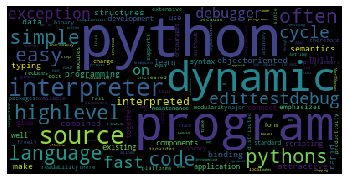

In [23]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()